In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import norm 


In [4]:
data = pd.read_csv(r'C:\Users\DELL2025\Downloads\Compressed\ab_testing.csv')
data.head()

,User ID,Group,Page Views,Time Spent,Conversion,Device,Location
0,14292,B,3,424,No,Mobile,Northern Ireland
1,11682,A,9,342,No,Mobile,Scotland
2,19825,A,2,396,No,Desktop,Northern Ireland
3,16080,B,4,318,No,Desktop,Wales
4,18851,A,1,338,Yes,Desktop,Scotland


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   User ID     5000 non-null   int64 
 1   Group       5000 non-null   object
 2   Page Views  5000 non-null   int64 
 3   Time Spent  5000 non-null   int64 
 4   Conversion  5000 non-null   object
 5   Device      5000 non-null   object
 6   Location    5000 non-null   object
dtypes: int64(3), object(4)
memory usage: 273.6+ KB


In [6]:
data.describe()

,User ID,Page Views,Time Spent
count,5000.000000,5000.000000,5000.000000
mean,14925.159000,7.537600,242.512600
std,2869.153773,4.022465,118.254153
min,10001.000000,1.000000,40.000000
25%,12456.250000,4.000000,137.000000
50%,14858.500000,8.000000,243.000000
75%,17379.750000,11.000000,346.000000
max,19995.000000,14.000000,449.000000


In [7]:
data.isna().sum()

User ID       0
Group         0
Page Views    0
Time Spent    0
Conversion    0
Device        0
Location      0
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
data['Group'].replace({'A':'Control','B':'Treatment'},inplace=True)
data.head()

C:\Users\DELL2025\AppData\Local\Temp\ipykernel_14616\3135000890.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Group'].replace({'A':'Control','B':'Treatment'},inplace=True)


,User ID,Group,Page Views,Time Spent,Conversion,Device,Location
0,14292,Treatment,3,424,No,Mobile,Northern Ireland
1,11682,Control,9,342,No,Mobile,Scotland
2,19825,Control,2,396,No,Desktop,Northern Ireland
3,16080,Treatment,4,318,No,Desktop,Wales
4,18851,Control,1,338,Yes,Desktop,Scotland


In [10]:
data['Location'].value_counts()

Location
Scotland            1281
England             1246
Northern Ireland    1242
Wales               1231
Name: count, dtype: int64

In [11]:
views_by_location = data.groupby('Location')['Page Views'].sum()
views_by_location

Location
England             9485
Northern Ireland    9297
Scotland            9715
Wales               9191
Name: Page Views, dtype: int64

In [12]:
time_by_location = data.groupby('Location')['Time Spent'].sum()
time_by_location

Location
England             306387
Northern Ireland    302005
Scotland            300114
Wales               304057
Name: Time Spent, dtype: int64

In [13]:
device_by_time = data.groupby('Device')['Time Spent'].sum()
device_by_time

Device
Desktop    617205
Mobile     595358
Name: Time Spent, dtype: int64

In [14]:
Device_by_location = data.groupby(['Location', 'Device']).size().sort_values(ascending=False)
Device_by_location

Location          Device 
Scotland          Desktop    654
Northern Ireland  Desktop    642
Scotland          Mobile     627
England           Mobile     625
Wales             Desktop    621
England           Desktop    621
Wales             Mobile     610
Northern Ireland  Mobile     600
dtype: int64

In [15]:
# Total conversions
conversion_number = data[data['Conversion'] == 'Yes'].shape[0]
failed_conversion_number = data[data['Conversion'] == 'No'].shape[0]

# Total users per group
total_controlled_users = data[data['Group'] == 'Control'].shape[0]
total_treatment_users = data[data['Group'] == 'Treatment'].shape[0]

# Conversions per group 
conversion_in_controlled = data[(data['Group'] == 'Control') & (data['Conversion'] == 'Yes')].shape[0]
conversion_in_treatment = data[(data['Group'] == 'Treatment') & (data['Conversion'] == 'Yes')].shape[0]


print(f"Total successful conversions: {conversion_number}")
print(f"Total failed conversions: {failed_conversion_number}")
print(f"Total users in control group: {total_controlled_users}")
print(f"Total users in treatment group: {total_treatment_users}")
print(f"Conversions in control group: {conversion_in_controlled}")
print(f"Conversions in treatment group: {conversion_in_treatment}")




Total successful conversions: 485
Total failed conversions: 4515
Total users in control group: 2519
Total users in treatment group: 2481
Conversions in control group: 136
Conversions in treatment group: 349


In [16]:
control_rate = conversion_in_controlled / total_controlled_users

treatment_rate = conversion_in_treatment / total_treatment_users

conversion_total_groups = (conversion_in_controlled + conversion_in_treatment) / ( total_treatment_users + total_controlled_users)

conversion_rate_uplift = (treatment_rate - control_rate) * 100

print(f"Control Conversion Rate: {control_rate:.2%}")
print(f"Treatment Conversion Rate: {treatment_rate:.2%}")
print(f"total Conversion Rate: {conversion_total_groups:.2%}")
print(f"Conversion Uplift: {conversion_rate_uplift:.2f}%")

Control Conversion Rate: 5.40%
Treatment Conversion Rate: 14.07%
total Conversion Rate: 9.70%
Conversion Uplift: 8.67%


In [17]:
total_time_spend = data['Time Spent'].sum()

control_time_spend = data[data['Group'] == 'Control']['Time Spent'].sum()
treatment_time_spend = data[data['Group'] == 'Treatment']['Time Spent'].sum()

control_time_spend_rate = control_time_spend / total_time_spend
treatment_time_spend_rate = treatment_time_spend / total_time_spend

time_spend_uplift = (treatment_time_spend_rate - control_time_spend_rate) * 100

print(f"Control Time Spend Rate: {control_time_spend_rate:.2%}")
print(f"Treatment Time Spend Rate: {treatment_time_spend_rate:.2%}")
print(f"Time Spend Uplift: {time_spend_uplift:.2f}%")

Control Time Spend Rate: 50.22%
Treatment Time Spend Rate: 49.78%
Time Spend Uplift: -0.44%


In [18]:
alpha =  0.05
print("Alpha : Significance level is (probability of Type 1 error false positive) ",alpha)


delta = 0.01
print("delta : minimum dectectable effect is ",delta)

Alpha : Significance level is (probability of Type 1 error false positive)  0.05
delta : minimum dectectable effect is  0.01


In [19]:
pooled_variance = (control_rate * (1 - control_rate) / total_controlled_users) + (treatment_rate * (1 - treatment_rate) / total_treatment_users)
print("pooled variance is " ,pooled_variance)


statisitcal_error = (np.sqrt(pooled_variance) ) * 100
print(f"Statistical Error: {statisitcal_error:.2f}% (margin of error)")

test_statistic = (treatment_rate - control_rate) / (statisitcal_error / 100)
print(f"Test Statistic: {test_statistic:.2f}")

critical_value = norm.ppf(1 - alpha)
print(f"Critical Value: {critical_value:.2f}")

p_value = 1 - norm.cdf(test_statistic)
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Reject the Null Hypothesis")
else:
    print("Fail to Reject the Null Hypothesis")


pooled variance is  6.899863177204392e-05
Statistical Error: 0.83% (margin of error)
Test Statistic: 10.44
Critical Value: 1.64
P-value: 0.0000
Reject the Null Hypothesis


In [20]:

CI = [ round((treatment_rate - control_rate) - (statisitcal_error/100) * critical_value , 3),
       round((treatment_rate - control_rate) + (statisitcal_error/100) * critical_value , 3)
]

print(f"Confidence Interval: {CI}")

Confidence Interval: [np.float64(0.073), np.float64(0.1)]


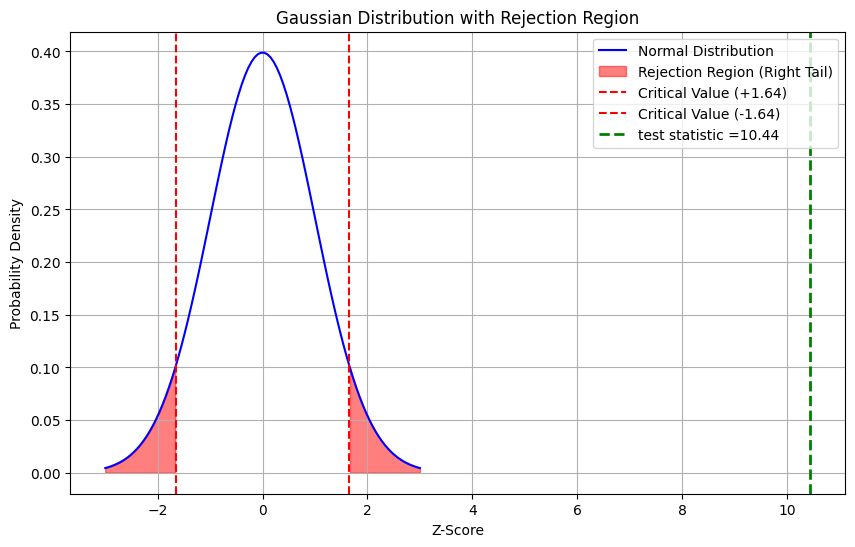

In [27]:
plt.figure(figsize=(10, 6))

# Plot the Gaussian distribution
plt.plot(x, y, label='Normal Distribution', color='blue')

# Shade the rejection region
plt.fill_between(x, 0, y, where=(x > critical_value), color='red', alpha=0.5, label='Rejection Region (Right Tail)')
plt.fill_between(x, 0, y, where=(x < -critical_value), color='red', alpha=0.5)

# Add labels and legend
plt.axvline(critical_value, color='red', linestyle='--', label=f'Critical Value (+{critical_value:.2f})')
plt.axvline(-critical_value, color='red', linestyle='--', label=f'Critical Value (-{critical_value:.2f})')
plt.axvline(test_statistic,color ='green' , linestyle = 'dashed' , linewidth = 2 , label =f'test statistic ={test_statistic:.2f} ')
plt.title('Gaussian Distribution with Rejection Region')
plt.xlabel('Z-Score')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()

plt.show()